In [1]:
import glacierml as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option('display.max_columns',None)
import path_manager as pm
[
        home_path, data_path, RGI_path, glathida_path, 
        ref_path, coregistration_testing_path, 
        arch_test_path, LOO_path
] = pm.set_paths()
import scipy.stats as st

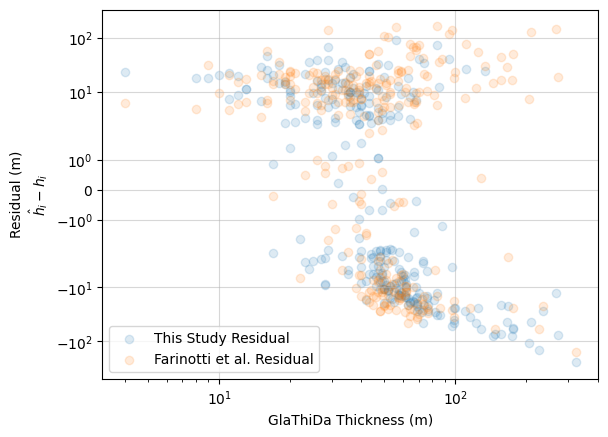

In [2]:
cols, df = gl.load_LOO_data(home_path,include_train = True,include_refs = True)
x = df['Thickness']*1e3
y = np.mean(df[cols],axis = 1)*1e3
z = df['FMT']*1e3
plt.scatter(
    x,(y-x),alpha = 0.15,label = 'This Study Residual'
)
plt.scatter(
    x,(z-x),alpha = 0.15,label = 'Farinotti et al. Residual'
)
plt.xlabel('GlaThiDa Thickness (m)')
plt.ylabel('Residual (m)\n$\hat{h}_i - h_i$')
plt.legend()
plt.yscale('symlog')
plt.xscale('log')
plt.grid(alpha = 0.5)
plt.show()


In [3]:
df = pd.concat(
    [
        df,
        pd.Series(np.mean(df[cols],axis = 1),name = 'est'),
        pd.Series(np.mean(df[cols],axis = 1) - df['Thickness'], name = 'Residual'),
        pd.Series(df['FMT'] - df['Thickness'], name = 'FResidual')
    ], axis = 1
)

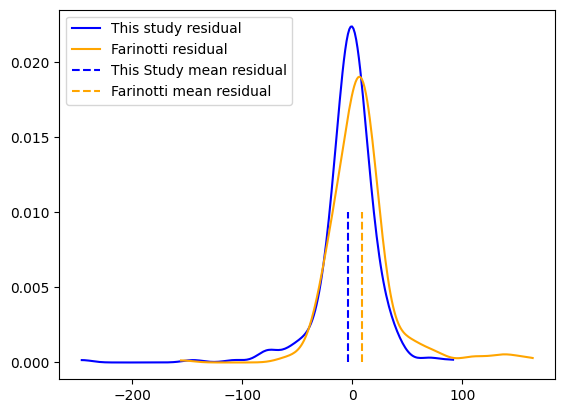

This study mean residual = -3.534
Farinotti mean residual = 8.409
Variance of this study residual = 797.3784458062852
Variance of Farinotti residual = 1073.0981957803024
t_obs = -1.74
t_crit = -1.96
p-value = 0.08


Text(0.5, 0, 'T-values')

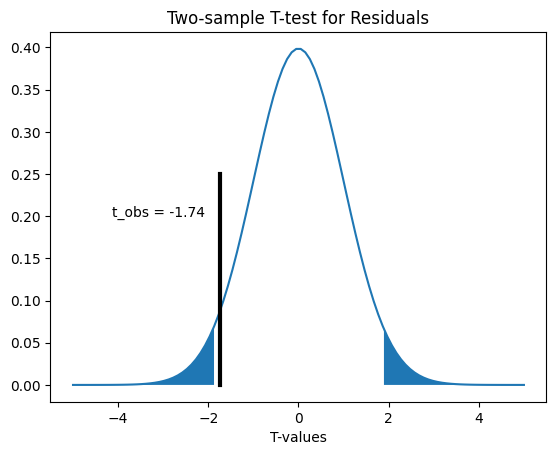

In [4]:
x1 = df['Residual']*1e3
x2 = df['FResidual']*1e3
kde1 = st.gaussian_kde(np.array(x1))
kde2 = st.gaussian_kde(np.array(x2))
#visualize KDE
x1_eval = np.linspace(x1.min(),x1.max(), num=len(x1))
plt.plot(x1_eval, kde1(x1_eval), '-',color = 'blue',label = 'This study residual')

x2_eval = np.linspace(x2.min(),x2.max(), num=len(x2))
plt.plot(x2_eval, kde2(x2_eval),color = 'orange',label = 'Farinotti residual')

plt.plot(
    (x1.mean(),x1.mean()),
    (0,0.01),'--',color = 'blue',label = 'This Study mean residual'
)

plt.plot(
    (x2.mean(),x2.mean()),
    (0,0.01),'--',color = 'orange',label = 'Farinotti mean residual'
)


plt.legend()
plt.show()

print(f'This study mean residual = {np.round(x1.mean(),3)}')
print(f'Farinotti mean residual = {np.round(x2.mean(),3)}')

print(f'Variance of this study residual = {np.var(x1)}')
print(f'Variance of Farinotti residual = {np.var(x2)}')

n_1 = len(x1)
n_2 = len(x2)

X_1 = np.mean(x1)
X_2 = np.mean(x2)

s_1 = np.var(x1)
s_2 = np.var(x2)

dof = (n_1 + n_2 - 2)

pooled_var = (
    ((n_1 - 1) * s_1) + ((n_2 - 1) * s_2)
) / dof

se_means = (pooled_var / n_1) + (pooled_var / n_2)

t_obs = (X_1 - X_2) / se_means

print(f't_obs = {np.round(t_obs,2)}')

t_crit = st.t.ppf(0.025, df = dof)

print(f't_crit = {np.round(t_crit,2)}')

p_value = 2*(st.t.cdf(-abs(t_obs), dof))
print(f'p-value = {np.round(p_value,2)}')

x = np.linspace(-5,5,100)

y = st.t.pdf(x,dof,0,1)

plt.plot(x,y)

plt.fill_between(
    x = x,
    y1 = y,
)
plt.fill_between(
    x = x,
    y1 = y,
    where = (x<-t_crit)&(x>t_crit),
    color = 'white'
)
plt.plot(
    (t_obs,t_obs),
    (0,0.25),
    linewidth = 3,
    color = 'k'
)
plt.text(
    t_obs - 2.4, 0.2,f't_obs = {np.round(t_obs,2)}'
)
plt.title('Two-sample T-test for Residuals')
plt.xlabel('T-values')

#### So our residuals are normally distributed and statistically similar to that of Farinotti et al. 2019
#### How do the distributions stack up against GlaThiDa?

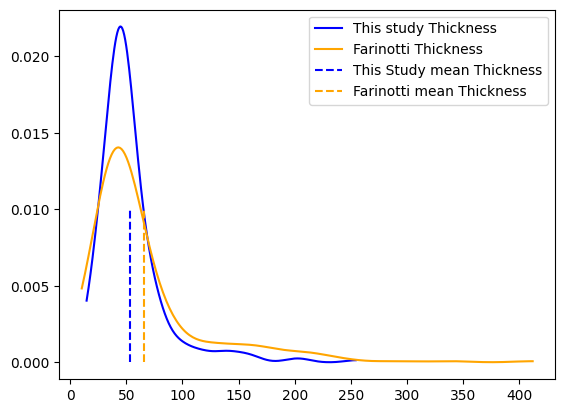

This study mean thickness = 53.733001708984375
Farinotti mean thickness = 65.6760025024414
t_obs = -0.84
t_crit = -1.96
p-value = 0.4


Text(0.5, 0, 'T-values')

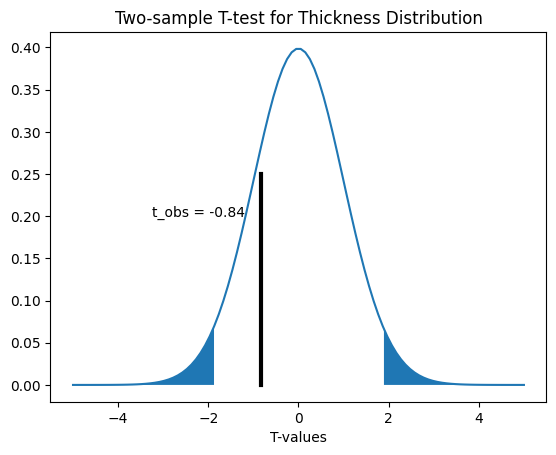

In [5]:
x1 = (df['est']*1e3)
x2 = (df['FMT']*1e3)
x3 = (df['Thickness']*1e3)
kde1 = st.gaussian_kde(np.array(x1))
kde2 = st.gaussian_kde(np.array(x2))
#visualize KDE
x1_eval = np.linspace(x1.min(),x1.max(), num=len(x1))
plt.plot(x1_eval, kde1(x1_eval), '-',color = 'blue',label = 'This study Thickness')

x2_eval = np.linspace(x2.min(),x2.max(), num=len(x2))
plt.plot(x2_eval, kde2(x2_eval),color = 'orange',label = 'Farinotti Thickness')

plt.plot(
    (x1.mean(),x1.mean()),
    (0,0.01),'--',color = 'blue',label = 'This Study mean Thickness'
)

plt.plot(
    (x2.mean(),x2.mean()),
    (0,0.01),'--',color = 'orange',label = 'Farinotti mean Thickness'
)

# plt.xscale('log')
plt.legend()
plt.show()

print(f'This study mean thickness = {np.round(x1.mean(),3)}')
print(f'Farinotti mean thickness = {np.round(x2.mean(),3)}')

n_1 = len(x1)
n_2 = len(x2)

X_1 = np.mean(x1)
X_2 = np.mean(x2)

s_1 = np.var(x1)
s_2 = np.var(x2)

dof = (n_1 + n_2 - 2)

pooled_var = (
    ((n_1 - 1) * s_1) + ((n_2 - 1) * s_2)
) / dof

se_means = (pooled_var / n_1) + (pooled_var / n_2)

t_obs = (X_1 - X_2) / se_means

print(f't_obs = {np.round(t_obs,2)}')

t_crit = st.t.ppf(0.025, df = dof)

print(f't_crit = {np.round(t_crit,2)}')

p_value = 2*(st.t.cdf(-abs(t_obs), dof))
print(f'p-value = {np.round(p_value,2)}')

x = np.linspace(-5,5,100)

y = st.t.pdf(x,dof,0,1)

plt.plot(x,y)

plt.fill_between(
    x = x,
    y1 = y,
)
plt.fill_between(
    x = x,
    y1 = y,
    where = (x<-t_crit)&(x>t_crit),
    color = 'white'
)
plt.plot(
    (t_obs,t_obs),
    (0,0.25),
    linewidth = 3,
    color = 'k'
)
plt.text(
    t_obs - 2.4, 0.2,f't_obs = {np.round(t_obs,2)}'
)
plt.title('Two-sample T-test for Thickness Distribution')
plt.xlabel('T-values')